In [1]:
"""
This file create the figure time series 
daily variables of the aws 

"""

import sys
import xarray as xr
import pandas as pd
import numpy as np
import time
import dateutil
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import matplotlib.dates as mdates
from my_fun.nan_helper import nan_helper

from my_fun.top_rad import solarFParallel

from my_fun.aws2cosipyConfig import *


In [2]:
cs_file = '../../data/input/Peru/data_aws_peru.csv'
start_date = '20160901'
end_date   = '20170831'
dir_graphics = 'out'
name_fig       = 'aws_daily'


date_parser = lambda x: dateutil.parser.parse(x, ignoretz=True)
df = pd.read_csv(cs_file, 
    delimiter='\t', index_col=['TIMESTAMP'], parse_dates=['TIMESTAMP'], 
    na_values='NAN',date_parser=date_parser)


df = df.loc[start_date:end_date]


In [3]:
rad_top = np.zeros((len(df.index),1))
lat = -8.965331
lon = -77.632009
for t in range(len(df.index)):
    day = df.index[t].dayofyear
    hour = df.index[t].hour
    paramet = solarFParallel(lat, lon, timezone_lon, day, hour)
    paramet = paramet[3]
    if paramet<0:
       paramet = 0.0 
    rad_top[t,0] = paramet

rad_t = pd.DataFrame(rad_top,df.index,columns = ['SWtop'])

rad_t = rad_t.resample('D').agg({'SWtop': 'mean'})

df0 = df.resample('M').agg({T2_var: 'mean', RH2_var: 'mean', U2_var: 'mean',
                RRR_var: 'sum', G_var: 'mean', PRES_var: 'mean', N_var:'mean'})

df1 = df.resample('D').agg({T2_var: 'mean', RH2_var: 'mean', U2_var: 'mean',
                RRR_var: 'sum', G_var: 'mean', PRES_var: 'mean', N_var:'mean'})

df2 = df1.resample('M').agg({T2_var: 'mean', RH2_var: 'mean', U2_var: 'mean',
                RRR_var: 'sum', G_var: 'mean', PRES_var: 'mean', N_var:'mean'})
    

In [8]:
G = df1[G_var]           # Incoming shortwave radiation
PRES = df1[PRES_var]     # Pressure
RRR = df1[RRR_var]       # Precipitation
N = df1[N_var]           # Cloud cover fraction
T2 = df1[T2_var]-273.15         # Temperature
RH2 = df1[RH2_var]
U2  = df1[U2_var]
RRR_cum = RRR.cumsum()


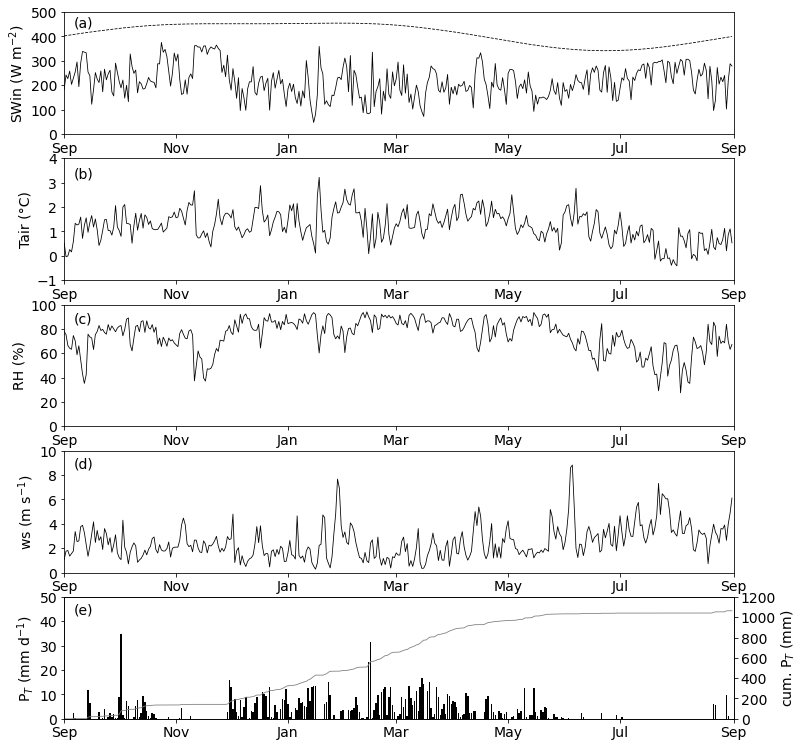

In [10]:
fig, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(5,1,figsize=(12,13))    
ax0.plot(rad_t,'--k', lw=0.8)
ax0.plot(G,'-k', lw=0.8)
ax0.set_ylim(0, 500)
ax0.set_yticks(np.arange(0, 600, 100))
ax0.set_xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2017-09-01'))
date_form = mdates.DateFormatter("%b")
ax0.xaxis.set_major_formatter(date_form)
ax0.set_ylabel('SWin (W m$^{-2}$)')
ax0.text(pd.Timestamp("2016-09-6"), 440, "(a)")

ax1.plot(T2,'-k', lw=0.8)
ax1.set_ylim(-1,3)
ax1.set_yticks(np.arange(-1, 5, 1))
ax1.set_xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2017-09-01'))
date_form = mdates.DateFormatter("%b")
ax1.xaxis.set_major_formatter(date_form)
ax1.set_ylabel('Tair (°C)')
ax1.text(pd.Timestamp("2016-09-6"), 3.2, "(b)")

ax2.plot(RH2,'-k', lw=0.8)
ax2.set_ylim(0,100)
ax2.set_yticks(np.arange(0, 120, 20))
ax2.set_xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2017-09-01'))
date_form = mdates.DateFormatter("%b")
ax2.xaxis.set_major_formatter(date_form)
ax2.set_ylabel('RH (%)')
ax2.text(pd.Timestamp("2016-09-6"), 85, "(c)")

ax3.plot(U2,'-k', lw=0.8)
ax3.set_ylim(0,10)
ax3.set_yticks(np.arange(0, 12, 2))
ax3.set_xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2017-09-01'))
date_form = mdates.DateFormatter("%b")
ax3.xaxis.set_major_formatter(date_form)
ax3.set_ylabel('ws (m s$^{-1}$)')
ax3.text(pd.Timestamp("2016-09-6"), 8.6, "(d)")

ax4.bar(RRR.index,RRR.values,facecolor='k')
ax4.set_ylim(0,50)
ax4.set_yticks(np.arange(0, 60, 10))
ax4.set_ylabel('P$_{T}$ (mm d$^{-1}$)')
ax4.text(pd.Timestamp("2016-09-6"), 43, "(e)")

ax5 = ax4.twinx()
ax5.plot(RRR_cum,'-',color='tab:gray', lw=0.8)
ax5.set_ylim(0,1200)
ax5.set_yticks(np.arange(0, 1400, 200))
ax5.set_ylabel('cum. P$_{T}$ (mm)')

ax5.set_xlim(pd.Timestamp('2016-09-01'), pd.Timestamp('2017-09-01'))
date_form = mdates.DateFormatter("%b")
ax5.xaxis.set_major_formatter(date_form)

font_t = 14
plt.rc('font', size=font_t)          # controls default text sizes
plt.rc('axes', titlesize=font_t)     # fontsize of the axes title
plt.rc('axes', labelsize=font_t)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_t)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_t)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_t)    # legend fontsize


In [11]:
fig.savefig(dir_graphics+'/'+name_fig+'.eps',dpi = 300, bbox_inches = 'tight', 
             pad_inches = 0.1, format='eps')